Name: Jiwon Jeong
Github Username:jeongjwn
USC ID: 6432-6572-41


In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [1]:
import pandas as pd

df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', header=None, )
df.columns = ['style']
df1 = df['style'].str.split(' ', expand=True)
df1.columns = ['pelvic incidence','pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'classes']
df1 = df1.replace({'NO':'0', 'AB' : '1'})

df1['pelvic incidence']= pd.to_numeric(df1['pelvic incidence'], errors = 'raise')
df1['pelvic tilt']= pd.to_numeric(df1['pelvic tilt'], errors = 'raise')
df1['lumbar lordosis angle']= pd.to_numeric(df1['lumbar lordosis angle'], errors = 'raise')
df1['sacral slope']= pd.to_numeric(df1['sacral slope'], errors = 'raise')
df1['pelvic radius']= pd.to_numeric(df1['pelvic radius'], errors = 'raise')
df1['grade of spondylolisthesis']= pd.to_numeric(df1['grade of spondylolisthesis'], errors = 'raise')

ab = df1.dtypes
df1

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


# **Question** 1(b)i


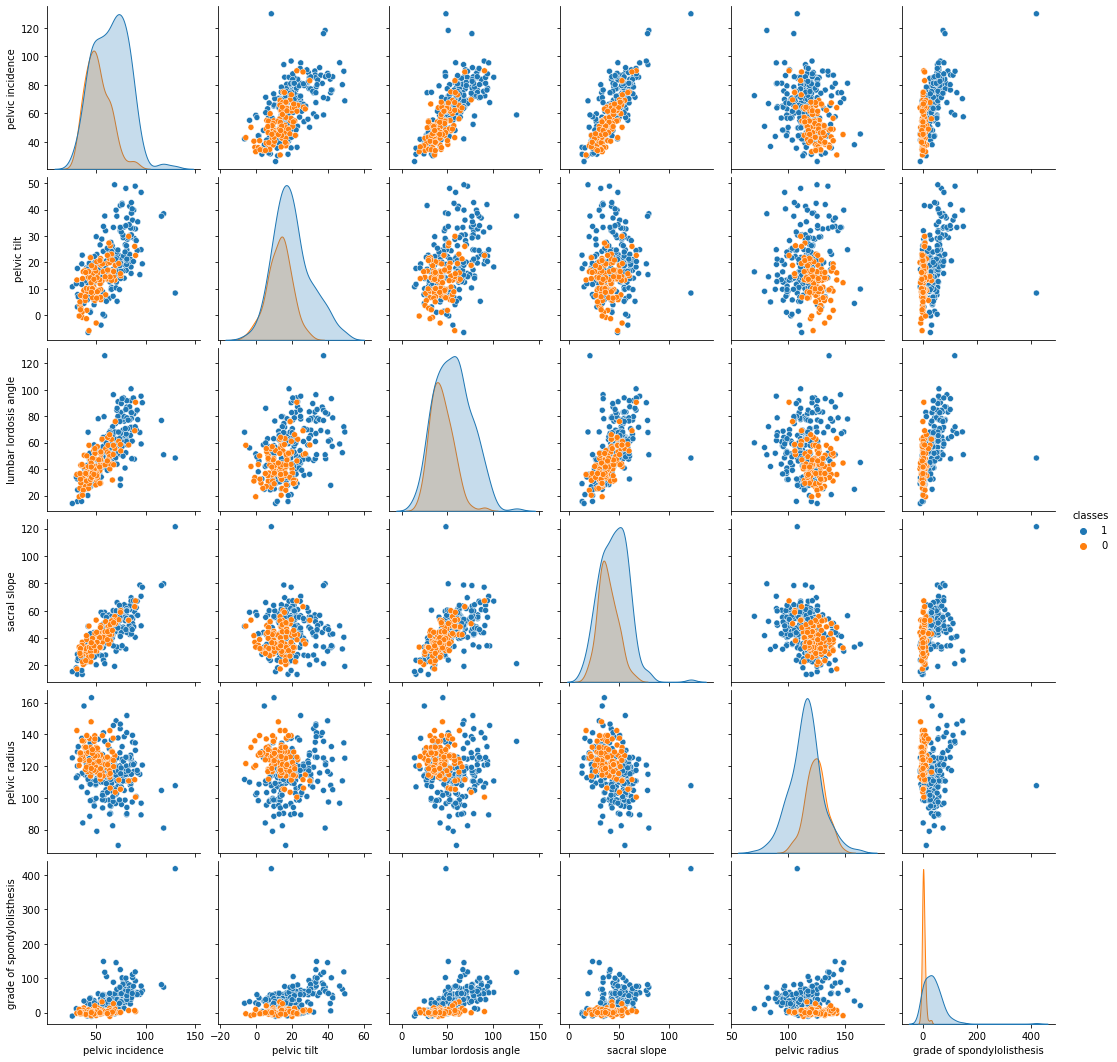

In [323]:
df_copy = df1
pairplot_fig = sns.pairplot(df_copy, vars=df_copy.columns[0:-1], hue = 'classes')
plt.show()

# Question 1 (b)ii


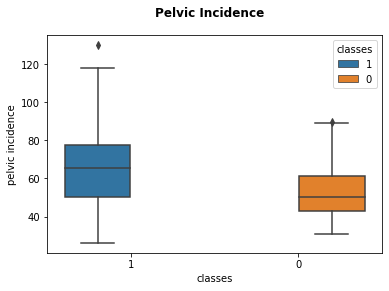

In [324]:
fig = plt.figure()
fig.suptitle('Pelvic Incidence', fontweight = 'bold')
sns.boxplot(y = 'pelvic incidence', x = 'classes', data = df_copy, hue = 'classes')
plt.show()

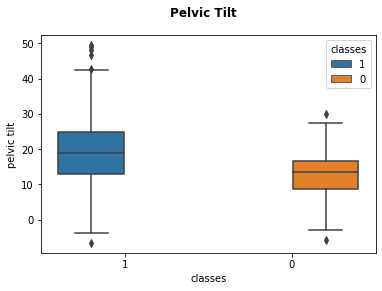

In [325]:
fig = plt.figure()
fig.suptitle('Pelvic Tilt', fontweight = 'bold')
sns.boxplot(y = 'pelvic tilt', x = 'classes', data = df_copy, hue = 'classes')
plt.show()

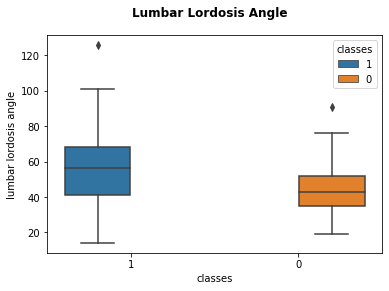

In [326]:
fig = plt.figure()
fig.suptitle('Lumbar Lordosis Angle', fontweight = 'bold')
sns.boxplot(y = 'lumbar lordosis angle', x = 'classes', data = df_copy, hue = 'classes')
plt.show()

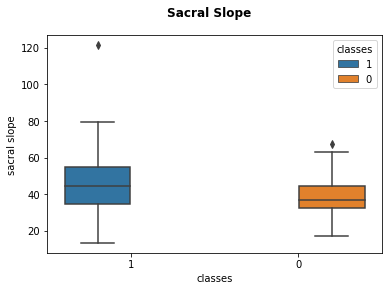

In [327]:
fig = plt.figure()
fig.suptitle('Sacral Slope', fontweight = 'bold')
sns.boxplot(y = 'sacral slope', x = 'classes', data = df_copy, hue = 'classes')
plt.show()

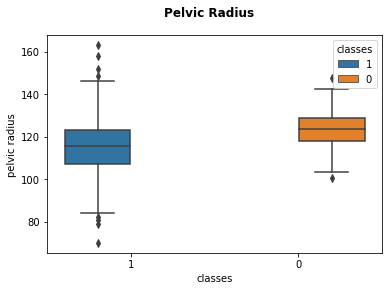

In [328]:
fig = plt.figure()
fig.suptitle('Pelvic Radius', fontweight = 'bold')
sns.boxplot(y = 'pelvic radius', x = 'classes', data = df_copy, hue = 'classes')
plt.show()

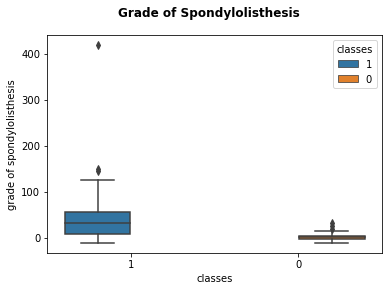

In [329]:
fig = plt.figure()
fig.suptitle('Grade of Spondylolisthesis', fontweight = 'bold')
sns.boxplot(y = 'grade of spondylolisthesis', x = 'classes', data = df_copy, hue = 'classes')
plt.show()

# Question 1(b)iii

In [330]:
df_copy2 = df1
df_copy3 = df1

df_copy1 = (df_copy.loc[df_copy['classes']=='0']).iloc[0:70]
df_tst1 = (df_copy.loc[df_copy['classes']=='0']).iloc[70:]
df_copy2 = (df_copy2.loc[df_copy2['classes']=='1']).iloc[0:140]
df_tst2 = df_copy3.loc[df_copy3['classes']=='1'].iloc[140:]


frames = [df_copy1, df_copy2]
df_training = pd.concat(frames)
frames1 = [df_tst1, df_tst2]
df_testing = pd.concat(frames1)
#df_training
# df_testing


# Question 1(c)i

In [331]:
x_train = df_training.iloc[:, [0, 1, 2, 3, 4, 5]].values
y_train = df_training.iloc[:, -1].values
x_test = df_testing.iloc[:, [0, 1, 2, 3, 4, 5]].values
y_test = df_testing.iloc[:, -1].values

from sklearn.neighbors import KNeighborsClassifier

clsfr = KNeighborsClassifier(n_neighbors=4)
clsfr.fit(x_train, y_train)

clsfr.score(x_test, y_test)


0.94

# Question 1 (c) ii

Most Suitable k  4
True Positive Rate:  0.9615384615384616
True Negative Rate:  0.9324324324324325
Classificationn Report:  
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



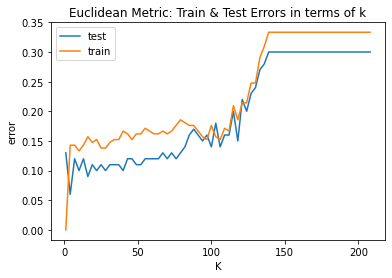

In [332]:
test_k = []
for i in range(208, 0, -3): 
   test_k.append(i) 
error = []
error_train = []
for i in test_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    pred_tr_i = knn.predict(x_train)
    error_train.append(np.mean(pred_tr_i != y_train))


error_result= {'k':test_k, 'error': error, 'error_train': error_train}
firstdf = pd.DataFrame(data = error_result)
#firstdf[firstdf['error']==firstdf['error'].min()][['k','error']]
plt.plot(firstdf['k'],firstdf['error'],label = "test")
plt.plot(firstdf['k'],firstdf['error_train'],label = "train")
plt.legend()
plt.xlabel("K")
plt.ylabel("error")
plt.title("Euclidean Metric: Train & Test Errors in terms of k")

from sklearn.metrics import confusion_matrix
y_pred = clsfr.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)
#print (c_matrix)

min_error = firstdf['error'].min()
print('Most Suitable k ', firstdf.loc[firstdf['error'] == min_error, 'k'].item())

FP =   c_matrix.item(0,1)
FN = c_matrix.item(1,0)
TP = c_matrix.item(0,0)
TN = c_matrix.item(1,1)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
print('True Positive Rate: ', TPR )
print('True Negative Rate: ', TNR)

from sklearn.metrics import classification_report
print('Classificationn Report: ', '\n', classification_report(y_test, y_pred))




# Question 1(c)iii

Wasn't able to solve this question but I tried.

In [334]:
# training_size = [3,6]
# for i in training_size: 
#     new_training_set_cls0 = df_copy1[:(training_size//3)]
# print (new_training_set_cls0)
training_size = []
for i in range(10, 211, 10):
    training_size.append(i)
    
def get_diff_training_set(training_size):
    #for i in training_size: 
    global new_training_set
    new_training_set_cls0 = df_copy1.iloc[0:training_size//3]
    new_training_set_cls1 = df_copy2.iloc[0:training_size-(training_size//3)]
    double = [new_training_set_cls0, new_training_set_cls1]
    new_training_set = pd.concat(double)
    #return (new_training_set)


iii_test_k = []
for i in range(208, 0, -3): 
    iii_test_k.append(i) 
iiierror = []
iiierror_train = []


#print(new_training_set)

new_x_train = new_training_set.iloc[:, [0,1,2,3,4,5]].values
new_y_train = new_training_set.iloc[:, -1].values
new_x_test = x_test
new_y_test = y_test

for i in test_k:
    iiiknn = KNeighborsClassifier(n_neighbors=i)
    iiiknn.fit(new_x_train, new_y_train)
    iiipred_i = iiiknn.predict(new_x_test)
    iiierror.append(np.mean(iiipred_i != new_y_test))
    iiipred_tr_i = iiiknn.predict(new_x_train)
    iiierror_train.append(np.mean(iiipred_tr_i != new_y_train))
    
new_error_result= {'k':test_k, 'error': error, 'error_train': error_train}
newdf = pd.DataFrame(data = new_error_result)


get_diff_training_set(training_size)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 10, n_neighbors = 208

In [312]:
df_copy4 = df1
N = []
for i in range(10, 211, 10):
    N.append(i)
CLS = []
CLSS = []
for i in N:
    CLS.append(i//3)
    CLSS.append(i-(i//3))
    
zero = {"N": N, "Cls 0": CLS, "Cls 1" :CLSS}
NDF = pd.DataFrame(data = zero)

for i in N: 
    size_0 = NDF.loc[NDF['N'] == i, 'Cls 0'].item()
    size_1 = NDF.loc[NDF['N'] == i, 'Cls 1'].item()
    new_training_set_cls0 = (df_copy4.loc[df_copy4['classes']=='0']).iloc[:size_0]
    new_training_set_cls1 = (df_copy4.loc[df_copy4['classes']=='1']).iloc[:size_1]
    new_test_set_cls0 = (df_copy4.loc[df_copy4['classes']=='0']).iloc[size_0:]
    new_test_set_cls1 = (df_copy4.loc[df_copy4['classes']=='1']).iloc[size_1:]
    double = [new_training_set_cls0, new_training_set_cls1]
    trip = [new_test_set_cls0, new_test_set_cls1]
    new_training_set = pd.concat(double)
    new_test_set = pd.concat(trip)
print (len(new_training_set_cls0))
print (len(new_training_set_cls1))
print (len(new_test_set_cls0))
print (len(new_test_set_cls1))

iii_test_k = 1
# for i in range(1, 197, 5): 
#     iii_test_k.append(i) 
iiierror = []
iiierror_train = []

new_x_train = new_training_set_cls0.iloc[:, [0,1,2,3,4,5]].values
new_y_train = new_training_set_cls1.iloc[:, -1].values
new_x_test = new_test_set.iloc[:, [0,1,2,3,4,5]].values
new_y_test = new_test_set_cls1.iloc[:, -1].values

# for i in iii_test_k:
iiiknn = KNeighborsClassifier(n_neighbors=1)
iiiknn.fit(new_x_train, new_y_train)
# iiipred_i = iiiknn.predict(new_x_test)
# iiierror.append(np.mean(iiipred_i != new_y_test))
# iiipred_tr_i = iiiknn.predict(new_x_train)
# iiierror_train.append(np.mean(iiipred_tr_i != new_y_train))
# len(new_test_set)
# iiierror_train

# iii_error_result= {'N':N, 'error': iiierror}
# zerodf = pd.DataFrame(data = iii_error_result)
# iii_min_error = zerodf['error'].min()
# iii_k = zerodf.loc[zerodf['error'] == iii_min_error, 'N'].item()
# print('Most Suitable N: ', iii_k)

                                          
# plt.plot(zerodf['N'],zerodf['error'],label = "test")
# plt.plot(zerodf['N'],zerodf['error_train'],label = "train")
# plt.legend()
# plt.xlabel("K")
# plt.ylabel("error")
# plt.title("Euclidean Metric: Train & Test Errors in terms of k")

    

70
140
30
70


ValueError: Found input variables with inconsistent numbers of samples: [70, 140]

In [311]:
NDF

,N,Cls 0,Cls 1
0,10,3,7
1,20,6,14
2,30,10,20
3,40,13,27
4,50,16,34
5,60,20,40
6,70,23,47
7,80,26,54
8,90,30,60
9,100,33,67


In [320]:
NDF
for n in N: 
    size_0 = NDF.loc[NDF['N'] == n, 'Cls 0'].item()
    size_1 = NDF.loc[NDF['N'] == n, 'Cls 1'].item()
    new_training_set_cls0 = (df_copy4.loc[df_copy4['classes']=='0']).iloc[:size_0]
    new_training_set_cls1 = (df_copy4.loc[df_copy4['classes']=='1']).iloc[:size_1]
    new_test_set_cls0 = (df_copy4.loc[df_copy4['classes']=='0']).iloc[size_0:]
    new_test_set_cls1 = (df_copy4.loc[df_copy4['classes']=='1']).iloc[size_1:]
    double = [new_training_set_cls0, new_training_set_cls1]
    trip = [new_test_set_cls0, new_test_set_cls1]
    new_training = pd.concat(double)
    new_test = pd.concat(trip)

# ctr = (df_copy4.loc[df_copy4['classes']=='0']).iloc[0:3]
# ctr1 = (df_copy4.loc[df_copy4['classes']=='1']).iloc[3:]
# cts = ctr = (df_copy4.loc[df_copy4['classes']=='0']).iloc[0:7]
# cts1 = (df_copy4.loc[df_copy4['classes']=='1']).iloc[7:]
# XX = [ctr, ctr1]
# YY = [cts,cts1]
# cdf_training = pd.concat(XX)
# cdf_testing = pd.concat(YY)


    cx_train = new_training.iloc[:, [0, 1, 2, 3, 4, 5]].values
    cy_train = new_training.iloc[:, -1].values
    cx_test = new_test.iloc[:, [0, 1, 2, 3, 4, 5]].values
    cy_test = new_test.iloc[:, -1].values



    cerror = []
    cerror_train = []
    c_test_k = range(1, 197, 5)
    for i in c_test_k: 
        if i <= n:
            pass
        xxknn = KNeighborsClassifier(n_neighbors=i)
        xxknn.fit(cx_train, cy_train)
        cpred_i = xxknn.predict(cx_test)
        cerror.append(np.mean(cpred_i != cy_test))
        cpred_tr_i = xxknn.predict(cx_train)



    cerror_result= {'k':c_test_k, 'error': cerror, 'sample size': N}
    cdf = pd.DataFrame(data = cerror_result)
    cmin_error = cdf['error'].min()
    print('Most Suitable k ', cdf.loc[cdf['error'] == cmin_error, 'k'].item())
    print (cdf)
    
# plt.plot(cdf['k'],cdf['error'],label = "Learning Curve")
# plt.legend()
# plt.xlabel("K")
# plt.ylabel("error")
# plt.title("Learning Curve")







ValueError: Expected n_neighbors <= n_samples,  but n_samples = 10, n_neighbors = 11

Wasn't able to solve 1(c)iii


# Question 1 (d)i

In [335]:
from sklearn.neighbors import KNeighborsClassifier

mtest_k = []
for i in range(1, 197, 5): 
    mtest_k.append(i) 

m_error = []
for i in mtest_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    mpred_i = knn.predict(x_test)
    m_error.append(np.mean(mpred_i != y_test))
    
m_error_result= {'k':mtest_k, 'error': m_error}
seconddf = pd.DataFrame(data = m_error_result)
print(seconddf)

m_min_error = seconddf['error'].min()
m_k = seconddf.loc[seconddf['error'] == m_min_error, 'k'].item()
print('Most Suitable k: ', m_k)


# m_clsfr = KNeighborsClassifier(n_neighbors=m_k, metric='minkowski')
# m_clsfr.fit(x_train, y_train)


# m_FP =   c_matrix.item(0,1)
# m_FN = c_matrix.item(1,0)
# m_TP = c_matrix.item(0,0)
# m_TN = c_matrix.item(1,1)
# m_TPR = m_TP/(m_TP+m_FN)
# m_TNR = m_TN/(m_TN+m_FP) 
# print('True Positive Rate: ', m_TPR )
# print('True Negative Rate: ', m_TNR)

# print('Classificationn Report: ', '\n', classification_report(y_test, mpred_i))


      k  error
0     1   0.13
1     6   0.08
2    11   0.12
3    16   0.09
4    21   0.10
5    26   0.11
6    31   0.11
7    36   0.11
8    41   0.11
9    46   0.12
10   51   0.11
11   56   0.12
12   61   0.12
13   66   0.13
14   71   0.13
15   76   0.12
16   81   0.13
17   86   0.16
18   91   0.16
19   96   0.15
20  101   0.17
21  106   0.14
22  111   0.17
23  116   0.18
24  121   0.22
25  126   0.21
26  131   0.26
27  136   0.28
28  141   0.30
29  146   0.30
30  151   0.30
31  156   0.30
32  161   0.30
33  166   0.30
34  171   0.30
35  176   0.30
36  181   0.30
37  186   0.30
38  191   0.30
39  196   0.30
Most Suitable k:  6


# Question 1(d)iA

In [336]:
mp_error = []
for i in mtest_k:
    mpknn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', p=1)
    mpknn.fit(x_train, y_train)
    mp_pred_i = mpknn.predict(x_test)
    mp_error.append(np.mean(mp_pred_i != y_test))
    
mp_error_result= {'k':mtest_k, 'error': mp_error}
thirddf = pd.DataFrame(data = mp_error_result)
print(thirddf)

mp_min_error = thirddf['error'].min()
mp_k = thirddf.loc[thirddf['error'] == mp_min_error, 'k'].tolist()
print('Most Suitable k: ', mp_k)


      k  error
0     1   0.12
1     6   0.11
2    11   0.11
3    16   0.12
4    21   0.12
5    26   0.11
6    31   0.12
7    36   0.13
8    41   0.13
9    46   0.13
10   51   0.14
11   56   0.13
12   61   0.15
13   66   0.15
14   71   0.14
15   76   0.14
16   81   0.16
17   86   0.15
18   91   0.20
19   96   0.20
20  101   0.22
21  106   0.21
22  111   0.23
23  116   0.21
24  121   0.22
25  126   0.24
26  131   0.28
27  136   0.28
28  141   0.30
29  146   0.30
30  151   0.30
31  156   0.30
32  161   0.30
33  166   0.30
34  171   0.30
35  176   0.30
36  181   0.30
37  186   0.30
38  191   0.30
39  196   0.30
Most Suitable k:  [6, 11, 26]


# Question 1(d)iB

In [337]:
log_p = []
for i in np.arange (0.1, 1.1, 0.1).round(1):
    log_p.append(i)
log_pp = np.power(10,log_p)
#print(log_pp)
def diff_man_dist(x):
    mpl_clsfr = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=x)
    mpl_clsfr.fit(x_train, y_train)
    mpl_pred_i = mpl_clsfr.predict(x_test)
    mpl_error.append(np.mean(mpl_pred_i != y_test))


mpl_error = []
for i in log_pp:
    x = i
    diff_man_dist(x)

mpl_error_result= {'log(p)':log_p, 'error': mpl_error}
fourthdf = pd.DataFrame(data = mpl_error_result)
print(fourthdf)

mpl_min_error = fourthdf['error'].min()
mpl_k = fourthdf.loc[fourthdf['error'] == mpl_min_error, 'log(p)'].tolist()
print('Best log(p) when k=6: ', mpl_k)


   log(p)  error
0     0.1   0.09
1     0.2   0.09
2     0.3   0.08
3     0.4   0.08
4     0.5   0.08
5     0.6   0.06
6     0.7   0.07
7     0.8   0.08
8     0.9   0.09
9     1.0   0.09
Best log(p) when k=6:  [0.6]


# Question 1(d)iC

In [338]:
chlist = []
for i in range(1, 197, 5):
    chlist.append(i)
    
def dC(chi):
    c_clsfr = KNeighborsClassifier(n_neighbors=chi, metric='chebyshev', p=np.inf)
    c_clsfr.fit(x_train, y_train)
    c_pred_i = c_clsfr.predict(x_test)
    c_error.append(np.mean(c_pred_i != y_test))

c_error = []
for i in chlist:
    dC(i)

c_error_result= {'k':chlist, 'error': c_error}
fifthdf = pd.DataFrame(data = c_error_result)
print(fifthdf)

c_min_error = fifthdf['error'].min()
c_k = fifthdf.loc[fifthdf['error'] == c_min_error, 'k'].tolist()
print('Most Suitable k: ', c_k)


      k  error
0     1   0.13
1     6   0.10
2    11   0.12
3    16   0.08
4    21   0.11
5    26   0.12
6    31   0.12
7    36   0.10
8    41   0.13
9    46   0.12
10   51   0.12
11   56   0.12
12   61   0.14
13   66   0.13
14   71   0.14
15   76   0.11
16   81   0.14
17   86   0.12
18   91   0.15
19   96   0.14
20  101   0.19
21  106   0.18
22  111   0.18
23  116   0.18
24  121   0.21
25  126   0.21
26  131   0.25
27  136   0.28
28  141   0.30
29  146   0.30
30  151   0.30
31  156   0.30
32  161   0.30
33  166   0.30
34  171   0.30
35  176   0.30
36  181   0.30
37  186   0.30
38  191   0.30
39  196   0.30
Most Suitable k:  [16]


# Question 1(d)ii

In [339]:

mtest_k = []
for i in range(1, 197, 5): 
    mtest_k.append(i) 

ma_error = []
for i in mtest_k:
    ma_knn = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params={'VI': np.cov(x_train, rowvar=False)})
    ma_knn.fit(x_train, y_train)
    mapred_i = ma_knn.predict(x_test)
    ma_error.append(np.mean(mapred_i != y_test))
    
ma_error_result= {'k':mtest_k, 'error': ma_error}
seventhdf = pd.DataFrame(data = ma_error_result)
print(seventhdf)

ma_min_error = seventhdf['error'].min()
ma_k = seventhdf.loc[seventhdf['error'] == ma_min_error, 'k'].tolist()
print('Most Suitable k: ', ma_k)


      k  error
0     1   0.12
1     6   0.08
2    11   0.09
3    16   0.08
4    21   0.10
5    26   0.09
6    31   0.12
7    36   0.10
8    41   0.13
9    46   0.11
10   51   0.11
11   56   0.09
12   61   0.16
13   66   0.12
14   71   0.12
15   76   0.09
16   81   0.11
17   86   0.10
18   91   0.15
19   96   0.09
20  101   0.16
21  106   0.15
22  111   0.19
23  116   0.08
24  121   0.12
25  126   0.10
26  131   0.21
27  136   0.30
28  141   0.30
29  146   0.30
30  151   0.30
31  156   0.30
32  161   0.30
33  166   0.30
34  171   0.30
35  176   0.30
36  181   0.30
37  186   0.30
38  191   0.30
39  196   0.30
Most Suitable k:  [6, 16, 116]


# Question 1(e)Euclidean

In [340]:

wetest_k = []
for i in range(1, 197, 5): 
    wetest_k.append(i) 

we_error = []
for i in wetest_k:
    weknn = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance')
    weknn.fit(x_train, y_train)
    wepred_i = weknn.predict(x_test)
    we_error.append(np.mean(wepred_i != y_test))


#FINDING MINIMUM K & ERROR
we_error_result= {'k':wetest_k, 'error': we_error}
sixthdf = pd.DataFrame(data = we_error_result)
print(sixthdf)

we_min_error = sixthdf['error'].min()
we_k = sixthdf.loc[sixthdf['error']==we_min_error, 'k'].tolist()
print('Most Suitable K: ', we_k)

      k  error
0     1   0.13
1     6   0.10
2    11   0.12
3    16   0.11
4    21   0.11
5    26   0.11
6    31   0.11
7    36   0.11
8    41   0.11
9    46   0.11
10   51   0.11
11   56   0.11
12   61   0.11
13   66   0.11
14   71   0.11
15   76   0.12
16   81   0.13
17   86   0.13
18   91   0.14
19   96   0.14
20  101   0.12
21  106   0.14
22  111   0.14
23  116   0.13
24  121   0.13
25  126   0.13
26  131   0.14
27  136   0.14
28  141   0.17
29  146   0.19
30  151   0.19
31  156   0.20
32  161   0.23
33  166   0.25
34  171   0.27
35  176   0.27
36  181   0.27
37  186   0.27
38  191   0.28
39  196   0.28
Most Suitable K:  [6]


# Question 1(e)Manhattan

In [341]:
wm_error = []
for i in wetest_k:
    wmknn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance')
    wmknn.fit(x_train, y_train)
    wmpred_i = wmknn.predict(x_test)
    wm_error.append(np.mean(wmpred_i != y_test))


#FINDING MINIMUM K & ERROR
wm_error_result= {'k':wetest_k, 'error': wm_error}
eighthdf = pd.DataFrame(data = wm_error_result)
print(eighthdf)

wm_min_error = eighthdf['error'].min()
wm_k = eighthdf.loc[eighthdf['error']==wm_min_error, 'k'].tolist()
print('Most Suitable K: ', wm_k)

      k  error
0     1   0.12
1     6   0.11
2    11   0.11
3    16   0.12
4    21   0.11
5    26   0.10
6    31   0.11
7    36   0.11
8    41   0.11
9    46   0.11
10   51   0.12
11   56   0.12
12   61   0.13
13   66   0.13
14   71   0.11
15   76   0.12
16   81   0.14
17   86   0.14
18   91   0.13
19   96   0.13
20  101   0.15
21  106   0.15
22  111   0.15
23  116   0.15
24  121   0.15
25  126   0.15
26  131   0.15
27  136   0.16
28  141   0.17
29  146   0.18
30  151   0.19
31  156   0.21
32  161   0.24
33  166   0.25
34  171   0.27
35  176   0.27
36  181   0.27
37  186   0.27
38  191   0.28
39  196   0.29
Most Suitable K:  [26]


# Question 1(e)Chebyshev

In [342]:
wc_error = []
for i in wetest_k:
    wcknn = KNeighborsClassifier(n_neighbors=i, metric='chebyshev', weights='distance')
    wcknn.fit(x_train, y_train)
    wcpred_i = wcknn.predict(x_test)
    wc_error.append(np.mean(wcpred_i != y_test))


#FINDING MINIMUM K & ERROR
wc_error_result= {'k':wetest_k, 'error': wc_error}
ninethdf = pd.DataFrame(data = wc_error_result)
print(ninethdf)

wc_min_error = ninethdf['error'].min()
wc_k = ninethdf.loc[ninethdf['error']==wc_min_error, 'k'].tolist()
print('Most Suitable K: ', wc_k)

      k  error
0     1   0.13
1     6   0.13
2    11   0.12
3    16   0.11
4    21   0.12
5    26   0.12
6    31   0.11
7    36   0.11
8    41   0.11
9    46   0.12
10   51   0.12
11   56   0.12
12   61   0.11
13   66   0.13
14   71   0.12
15   76   0.12
16   81   0.12
17   86   0.14
18   91   0.13
19   96   0.14
20  101   0.14
21  106   0.14
22  111   0.14
23  116   0.14
24  121   0.15
25  126   0.14
26  131   0.16
27  136   0.16
28  141   0.18
29  146   0.19
30  151   0.21
31  156   0.21
32  161   0.23
33  166   0.26
34  171   0.26
35  176   0.26
36  181   0.27
37  186   0.27
38  191   0.27
39  196   0.28
Most Suitable K:  [16, 31, 36, 41, 61]


# Question 1(f)

minkowski with k = 6 and log(p)=0.6